In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\udashdavaa1\Downloads\datasets\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#creating condition
#separating the data for analysis
data_fraud = df[df.Class==1]
#creating non-fraud dataframe
data_non_fraud = df[df.Class==0]

# Step 1. Data Preprocessing


In [4]:
df.shape

(284807, 31)

In [5]:
df[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [6]:
#Dataset information
# no null in data and everything in numerical value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#Checking duplicated values
df.duplicated(keep='first').sum()

1081

In [8]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [9]:
#visualizing some of the original and duplicated rows and 33rd and 35th row is the duplicated row
df[30:36]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30,24.0,1.237429,0.061043,0.380526,0.761564,-0.359771,-0.494084,0.006494,-0.133862,0.438810,...,-0.245682,-0.530900,-0.044265,0.079168,0.509136,0.288858,-0.022705,0.011836,17.28,0
31,25.0,1.114009,0.085546,0.493702,1.335760,-0.300189,-0.010754,-0.118760,0.188617,0.205687,...,-0.053234,-0.004760,-0.031470,0.198054,0.565007,-0.337718,0.029057,0.004453,4.45,0
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0


In [10]:
#removing the duplicated rows
df.drop_duplicates(keep='first', inplace=True)

In [11]:
df.duplicated().sum()

0

# Feature Engineering


In [12]:
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Time_Day,Time_Hour,Time_Min
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,0


In [13]:
# Drop unnecessary columns
# We will drop Time,as we have derived the Day/Hour/Minutes from the time column 
df.drop('Time', axis = 1, inplace= True)
# We will keep only derived column hour, as day/minutes might not be very useful
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


# Step 2. Data analysis

In [14]:
# Data distribution analysis

classes = df['Class'].value_counts()
classes

0    283253
1       473
Name: Class, dtype: int64

Class
0    99.83329
1     0.16671
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

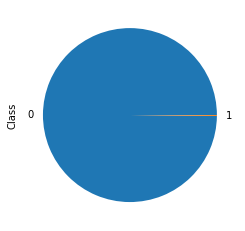

In [15]:
#class distribution by percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count()) *100)
((df.groupby('Class')['Class'].count()/df['Class'].count()) *100).plot.pie()

In [16]:
print(data_fraud.shape)
data_fraud.Amount.describe()


(492, 31)


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
print(data_non_fraud.shape)
data_non_fraud.Amount.describe()

(284315, 31)


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
# to plot the graphs
import matplotlib.pyplot as plt 
#to visualization
import seaborn as sns

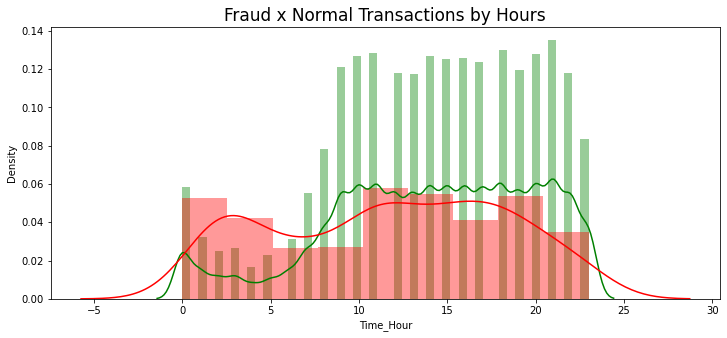

In [19]:
import warnings
warnings.filterwarnings("ignore")

#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], 
             color='g')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
#plt.xlim([1,24])
plt.show()

In [20]:
#checking the correlation
corr = df.corr()
corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
V1,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,...,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486,-0.004949
V2,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,...,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624,0.007929
V3,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,...,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322,-0.022645
V4,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,...,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326,-0.035251
V5,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,...,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812,-0.035817
V6,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,...,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915,-0.019417
V7,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,...,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347,-0.010502
V8,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,...,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068,0.032706
V9,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,...,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021,-0.191132
V10,0.000815,0.000620,-0.009632,0.002753,-0.006050,-0.002180,-0.013617,0.000481,-0.012613,1.000000,...,-0.000481,0.001917,0.000154,-0.000565,0.001089,0.010769,0.009159,-0.102255,-0.206971,0.022776


<function matplotlib.pyplot.show(close=None, block=None)>

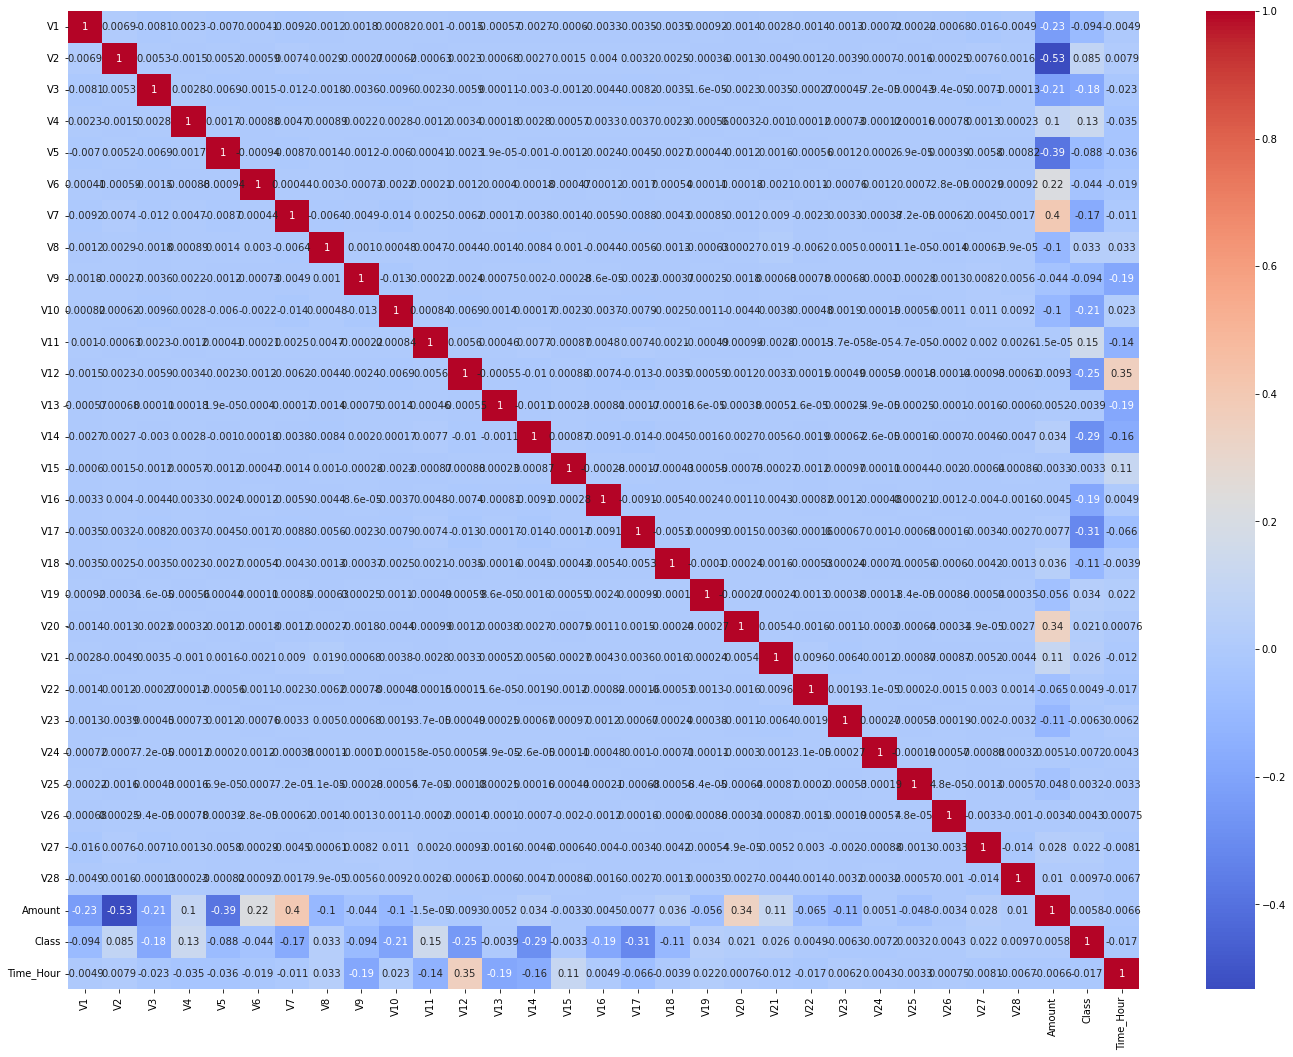

In [21]:
#Checking the correlation in heatmap annot=true is printing value
#dark blue-strongly correlated

plt.figure(figsize=(24,18))

sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show

# Step3. Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
#Putting feature variables into x
X = df.drop(['Class'], axis=1)
#Putting target variables to y
y = df['Class']
#Splitting data into train and test set 80/20
#stratify - uniformly distribute values, select random
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2, stratify=y)

# Step4 Model build

In [23]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
#training
dt.fit(X_train, y_train)
#testing
y_pred_dt = dt.predict(X_test)

In [24]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [25]:
# XGBoost Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Step 5. Model Evaluation

In [26]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import classification_report

In [27]:
#confusion matrix Decision Tree
confusion_matrix(y_test, y_pred_dt, labels = [0, 1])
#type1 error = 10 falsely classified as non fraud transaction, actually was fraud
#type2 error = 

array([[56627,    24],
       [   26,    69]], dtype=int64)

In [28]:
print("Decision tree score")
print("The accuracy is  |", accuracy_score(y_test, y_pred_dt)) 
print("The precision is |", precision_score(y_test, y_pred_dt))
print("The recall is    |", recall_score(y_test, y_pred_dt))
print("The F1 score is  |", f1_score(y_test, y_pred_dt))

Decision tree score
The accuracy is  | 0.9991188806259472
The precision is | 0.7419354838709677
The recall is    | 0.7263157894736842
The F1 score is  | 0.7340425531914895


In [29]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.74      0.73      0.73        95

    accuracy                           1.00     56746
   macro avg       0.87      0.86      0.87     56746
weighted avg       1.00      1.00      1.00     56746



In [30]:
#confusion matrix Random Forest
confusion_matrix(y_test, y_pred_rf, labels = [0, 1])
#type1 error = 10 falsely classified as non fraud transaction, actually was fraud
#type2 error = out of 113 transaction 32 falsely classified as an fraud but actually was non fraud

array([[56645,     6],
       [   23,    72]], dtype=int64)

In [31]:
print("Random Forest score")
print("The accuracy is  |", accuracy_score(y_test, y_pred_rf)) 
print("The precision is |", precision_score(y_test, y_pred_rf))
print("The recall is    |", recall_score(y_test, y_pred_rf))
print("The F1 score is  |", f1_score(y_test, y_pred_rf))

Random Forest score
The accuracy is  | 0.9994889507630493
The precision is | 0.9230769230769231
The recall is    | 0.7578947368421053
The F1 score is  | 0.8323699421965319


In [32]:
#confusion matrix XGBoost
confusion_matrix(y_test, y_pred_xgb, labels = [0, 1])

array([[56646,     5],
       [   21,    74]], dtype=int64)

In [33]:
print("XGBoost score")
print("The accuracy is  |", accuracy_score(y_test, y_pred_xgb)) 
print("The precision is |", precision_score(y_test, y_pred_xgb))
print("The recall is    |", recall_score(y_test, y_pred_xgb))
print("The F1 score is  |", f1_score(y_test, y_pred_xgb))

XGBoost score
The accuracy is  | 0.9995418179254926
The precision is | 0.9367088607594937
The recall is    | 0.7789473684210526
The F1 score is  | 0.8505747126436782


In [34]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.78      0.85        95

    accuracy                           1.00     56746
   macro avg       0.97      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746



# Under-Sampling method

In [35]:
#Because the data is unbalanced we are using under-sampling method
#Building sample dataset containing similar distribution of normal transaction and fraudulent transaction
#non_fraud_usample = data_non_fraud.sample(n=492)

In [36]:
#Concatinating 2 dataframe
#axis=0 adding row ways
#new_udf = pd.concat([non_fraud_usample, data_fraud], axis=0)

In [37]:
#new_udf.head()

In [38]:
#new_udf['Class'].value_counts()

In [39]:
#Splitting the data into features & targets
#X = new_udf.drop(columns='Class', axis=1)
#y = new_udf['Class']

In [40]:
#Split the data into training and testing data
#0.2=20%for testing data
#stratify=Y-equally distributed
#random_state=2-splitted into same way
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [41]:
#print(X.shape, X_train.shape, X_test.shape)

In [42]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter 

In [43]:
print('Original dataset shape %s' % Counter(y_train))

rus = RandomUnderSampler (random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0: 226602, 1: 378})
Resampled dataset shape Counter({0: 378, 1: 378})


In [44]:
#Decision tree

udt = DecisionTreeClassifier(max_depth = 4)
udt.fit(X_train_rus, y_train_rus)
y_pred_udt = udt.predict(X_test)

In [45]:
#random Forest

urf = RandomForestClassifier(max_depth = 4)
urf.fit(X_train_rus, y_train_rus)
y_pred_urf = urf.predict(X_test)

In [46]:
#XGBoost

uxgb = XGBClassifier(max_depth = 4)
uxgb.fit(X_train_rus, y_train_rus)
y_pred_uxgb = uxgb.predict(X_test)

In [47]:
#model evaluation Decision tree

confusion_matrix(y_test, y_pred_udt)

array([[54230,  2421],
       [    9,    86]], dtype=int64)

In [48]:
print("Decision tree score - Under sampling technique")
print("The accuracy is  |", accuracy_score(y_test, y_pred_udt)) 
print("The precision is |", precision_score(y_test, y_pred_udt))
print("The recall is    |", recall_score(y_test, y_pred_udt))
print("The F1 score is  |", f1_score(y_test, y_pred_udt))

Decision tree score - Under sampling technique
The accuracy is  | 0.9571775984210341
The precision is | 0.03430394894295971
The recall is    | 0.9052631578947369
The F1 score is  | 0.06610299769408147


In [49]:
#model evaluation Random forest

confusion_matrix(y_test, y_pred_urf, labels = [0, 1])


array([[56032,   619],
       [   11,    84]], dtype=int64)

In [50]:
print("Random Forest score - under sampling technique")
print("The accuracy is  |", accuracy_score(y_test, y_pred_urf)) 
print("The precision is |", precision_score(y_test, y_pred_urf))
print("The recall is    |", recall_score(y_test, y_pred_urf))
print("The F1 score is  |", f1_score(y_test, y_pred_urf))

Random Forest score - under sampling technique
The accuracy is  | 0.9888978958869348
The precision is | 0.11948790896159317
The recall is    | 0.8842105263157894
The F1 score is  | 0.2105263157894737


In [51]:
# model evaluation XGBoost

confusion_matrix(y_test, y_pred_uxgb, labels = [0, 1])

array([[54674,  1977],
       [    6,    89]], dtype=int64)

In [52]:
print("XGBoost score - under sampling technique")
print("The accuracy is  |", accuracy_score(y_test, y_pred_uxgb)) 
print("The precision is |", precision_score(y_test, y_pred_uxgb))
print("The recall is    |", recall_score(y_test, y_pred_uxgb))
print("The F1 score is  |", f1_score(y_test, y_pred_uxgb))

XGBoost score - under sampling technique
The accuracy is  | 0.9650548056250661
The precision is | 0.043078412391093904
The recall is    | 0.9368421052631579
The F1 score is  | 0.08236927348449792


# Random over-sampling method

In [53]:
from imblearn.over_sampling import RandomOverSampler

In [54]:
print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 226602, 1: 378})
Resampled dataset shape Counter({0: 226602, 1: 226602})


In [55]:
#Decision tree

odt = DecisionTreeClassifier(max_depth = 4)
odt.fit(X_train_ros, y_train_ros)
y_pred_odt = odt.predict(X_test)

In [56]:
#random Forest

orf = RandomForestClassifier(max_depth = 4)
orf.fit(X_train_ros, y_train_ros)
y_pred_orf = orf.predict(X_test)

In [57]:
#XGBoost

oxgb = XGBClassifier(max_depth = 4)
oxgb.fit(X_train_ros, y_train_ros)
y_pred_oxgb = oxgb.predict(X_test)

In [58]:
#model evaluation Decision tree

confusion_matrix(y_test, y_pred_odt)

array([[54891,  1760],
       [   14,    81]], dtype=int64)

In [59]:
print("Decision tree score - Over sampling technique")
print("The accuracy is  |", accuracy_score(y_test, y_pred_odt)) 
print("The precision is |", precision_score(y_test, y_pred_odt))
print("The recall is    |", recall_score(y_test, y_pred_odt))
print("The F1 score is  |", f1_score(y_test, y_pred_odt))

Decision tree score - Over sampling technique
The accuracy is  | 0.9687378846086068
The precision is | 0.043997827267789245
The recall is    | 0.8526315789473684
The F1 score is  | 0.08367768595041322


In [60]:
#model evaluation Random Forest

confusion_matrix(y_test, y_pred_orf)

array([[56489,   162],
       [   15,    80]], dtype=int64)

In [61]:
print("Random Forest - Over sampling technique")
print("The accuracy is  |", accuracy_score(y_test, y_pred_orf)) 
print("The precision is |", precision_score(y_test, y_pred_orf))
print("The recall is    |", recall_score(y_test, y_pred_orf))
print("The F1 score is  |", f1_score(y_test, y_pred_orf))

Random Forest - Over sampling technique
The accuracy is  | 0.9968808374158531
The precision is | 0.3305785123966942
The recall is    | 0.8421052631578947
The F1 score is  | 0.4747774480712167


In [62]:
#model evaluation XGBoost

confusion_matrix(y_test, y_pred_oxgb)

array([[56635,    16],
       [   17,    78]], dtype=int64)

In [63]:
print("XGBoost - Over sampling technique")
print("The accuracy is  |", accuracy_score(y_test, y_pred_oxgb)) 
print("The precision is |", precision_score(y_test, y_pred_oxgb))
print("The recall is    |", recall_score(y_test, y_pred_oxgb))
print("The F1 score is  |", f1_score(y_test, y_pred_oxgb))

XGBoost - Over sampling technique
The accuracy is  | 0.9994184612131252
The precision is | 0.8297872340425532
The recall is    | 0.8210526315789474
The F1 score is  | 0.8253968253968254


In [64]:
print(classification_report(y_test, y_pred_oxgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.83      0.82      0.83        95

    accuracy                           1.00     56746
   macro avg       0.91      0.91      0.91     56746
weighted avg       1.00      1.00      1.00     56746



# SMOTE over-sampling method

In [65]:
# SMOTE - balance the class with equal distribution
from imblearn.over_sampling import SMOTE
# counter takes values returns value_counts dictionary

print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 226602, 1: 378})
Resampled dataset shape Counter({0: 226602, 1: 226602})


In [66]:
#Decision tree

sdt = DecisionTreeClassifier(max_depth = 4)
sdt.fit(X_train_smote, y_train_smote)
y_pred_sdt = sdt.predict(X_test)

In [67]:
#Random Forest

srf = RandomForestClassifier(max_depth = 4)
srf.fit(X_train_smote, y_train_smote)
y_pred_srf = srf.predict(X_test)

In [68]:
#XGBoost

sxgb = XGBClassifier(max_depth = 4)
sxgb.fit(X_train_smote, y_train_smote)
y_pred_sxgb = sxgb.predict(X_test)

In [69]:
#model evaluation Decision tree

confusion_matrix(y_test, y_pred_sdt)

array([[55475,  1176],
       [   10,    85]], dtype=int64)

In [70]:
print("Decision tree score - SMOTE technique")
print("The accuracy is  |", accuracy_score(y_test, y_pred_sdt)) 
print("The precision is |", precision_score(y_test, y_pred_sdt))
print("The recall is    |", recall_score(y_test, y_pred_sdt))
print("The F1 score is  |", f1_score(y_test, y_pred_sdt))

Decision tree score - SMOTE technique
The accuracy is  | 0.9790998484474677
The precision is | 0.06740681998413957
The recall is    | 0.8947368421052632
The F1 score is  | 0.12536873156342182


In [71]:
#model evaluation Random Forest

confusion_matrix(y_test, y_pred_srf)

array([[56257,   394],
       [   14,    81]], dtype=int64)

In [72]:
print("Random Forest score - SMOTE technique")
print("The accuracy is  |", accuracy_score(y_test, y_pred_srf)) 
print("The precision is |", precision_score(y_test, y_pred_srf))
print("The recall is    |", recall_score(y_test, y_pred_srf))
print("The F1 score is  |", f1_score(y_test, y_pred_srf))

Random Forest score - SMOTE technique
The accuracy is  | 0.9928100659077291
The precision is | 0.1705263157894737
The recall is    | 0.8526315789473684
The F1 score is  | 0.2842105263157895


In [73]:
#model evaluation XGBoost

confusion_matrix(y_test, y_pred_sxgb)

array([[56600,    51],
       [   18,    77]], dtype=int64)

In [74]:
print("XGBoost score - SMOTE technique")
print("The accuracy is  |", accuracy_score(y_test, y_pred_sxgb)) 
print("The precision is |", precision_score(y_test, y_pred_sxgb))
print("The recall is    |", recall_score(y_test, y_pred_sxgb))
print("The F1 score is  |", f1_score(y_test, y_pred_sxgb))

XGBoost score - SMOTE technique
The accuracy is  | 0.9987840552638071
The precision is | 0.6015625
The recall is    | 0.8105263157894737
The F1 score is  | 0.6905829596412556


In [75]:
print(classification_report(y_test, y_pred_sxgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.60      0.81      0.69        95

    accuracy                           1.00     56746
   macro avg       0.80      0.90      0.84     56746
weighted avg       1.00      1.00      1.00     56746

